# Task 6.4 - Supervised Machine Learning

This notebook contains steps in order to prepare for Linear Regression modelling:
1. Installing sklearn
2. Scatterplot exploration to determine hypothesis
3. Re-shaping data for linear regresson
4. Splitting data into training and test sets
5. Running linear regression
6. Checking model performance

## Task Step 1 & 2 - Install and Import of Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display graphs
%matplotlib inline

In [3]:
# Define path
path = 'C:/Users/kaymi/OneDrive/Desktop/Career Foundry/Data Immersion/Achievement 6 - Advanced Data Analytics'

In [4]:
# Import prepared data (vacation rentals under $1,000 per nights)
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'vacation_listings_subset.csv'))

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,price_category,booking_requirement,popularity
0,0,0,13188,Rental unit in Vancouver · ★4.83 · Studio · 2 ...,51466,Family Guns,Riley Park,49.24773,-123.10509,Entire home/apt,...,260,2023-06-01,1.61,2,150,4,Vacation Rental,mid-price,less than 1 week,booked half year
1,1,1,13358,Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed...,52116,Lynn,West End,49.28201,-123.12669,Entire home/apt,...,454,2023-05-22,2.88,1,247,19,Vacation Rental,mid-price,less than 1 week,available half year
2,2,2,13490,Rental unit in Vancouver · ★4.92 · 1 bedroom ·...,52467,Iris,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,...,98,2023-05-01,0.67,1,121,5,Vacation Rental,mid-price,over 3 weeks,booked half year
3,3,3,14267,Home in Vancouver · ★4.76 · 1 bedroom · 2 beds...,56030,Peter & Alison,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,...,34,2021-07-14,0.22,1,0,0,Vacation Rental,mid-price,less than 1 week,popular
4,4,4,14424,Guest suite in Vancouver · ★4.69 · 1 bedroom ·...,56709,Samantha Jo,Downtown Eastside,49.27921,-123.08835,Entire home/apt,...,266,2023-05-25,1.64,4,187,7,Vacation Rental,low price,over 3 weeks,available half year


## Task Step 3 - Cleaning Data

In [6]:
# Drop Unnamed columns
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

In [7]:
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,price_category,booking_requirement,popularity
0,13188,Rental unit in Vancouver · ★4.83 · Studio · 2 ...,51466,Family Guns,Riley Park,49.24773,-123.10509,Entire home/apt,150,3,260,2023-06-01,1.61,2,150,4,Vacation Rental,mid-price,less than 1 week,booked half year
1,13358,Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed...,52116,Lynn,West End,49.28201,-123.12669,Entire home/apt,227,1,454,2023-05-22,2.88,1,247,19,Vacation Rental,mid-price,less than 1 week,available half year
2,13490,Rental unit in Vancouver · ★4.92 · 1 bedroom ·...,52467,Iris,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,98,2023-05-01,0.67,1,121,5,Vacation Rental,mid-price,over 3 weeks,booked half year
3,14267,Home in Vancouver · ★4.76 · 1 bedroom · 2 beds...,56030,Peter & Alison,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.22,1,0,0,Vacation Rental,mid-price,less than 1 week,popular
4,14424,Guest suite in Vancouver · ★4.69 · 1 bedroom ·...,56709,Samantha Jo,Downtown Eastside,49.27921,-123.08835,Entire home/apt,134,30,266,2023-05-25,1.64,4,187,7,Vacation Rental,low price,over 3 weeks,available half year


In [8]:
# Checking value counts of minimum_requirements
df['booking_requirement'].value_counts(dropna = False)

less than 1 week    3724
over 3 weeks        1991
1-3 weeks            214
Name: booking_requirement, dtype: int64

In [9]:
df.shape

(5929, 20)

Data cleaning to find outliers was conducted in the previous two exercises.

## Task Step 4 - Scatterplot exploration

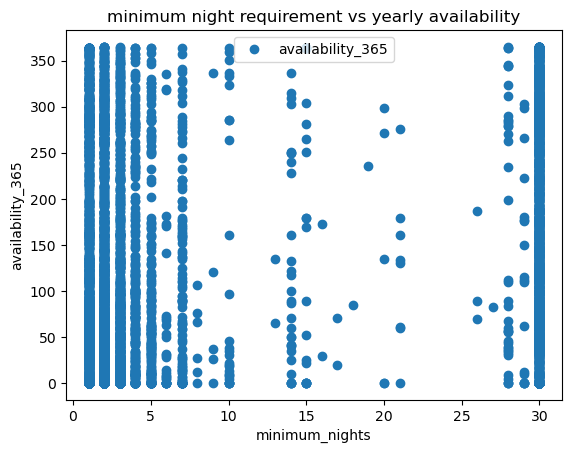

In [10]:
# Scatterplot for minimum nights vs yearly availability
df.plot(x = 'minimum_nights', y='availability_365',style='o') 
plt.title('minimum night requirement vs yearly availability')  
plt.xlabel('minimum_nights')  
plt.ylabel('availability_365')  
plt.show()

## Task Step 5 - Hypothesis

If a unit has a high minimum night requirement of 3 or more weeks, then the availability of the unit will be higher than units with minimum night requirements of less than 3 weeks

## Task Step 6 - Reshape for Analysis

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['minimum_nights'].values.reshape(-1,1)
y = df['availability_365'].values.reshape(-1,1)

In [12]:
X

array([[ 3],
       [ 1],
       [30],
       ...,
       [30],
       [ 1],
       [30]], dtype=int64)

In [13]:
y

array([[150],
       [247],
       [121],
       ...,
       [363],
       [106],
       [362]], dtype=int64)

## Task Step 7 - Split data into training and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Task Step 8 - Run linear regression 

In [15]:
# Create regression object
regression = LinearRegression()

In [16]:
# Fit regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using x
y_predicted = regression.predict(X_test)

## Task Step 9 - Create plot on test set

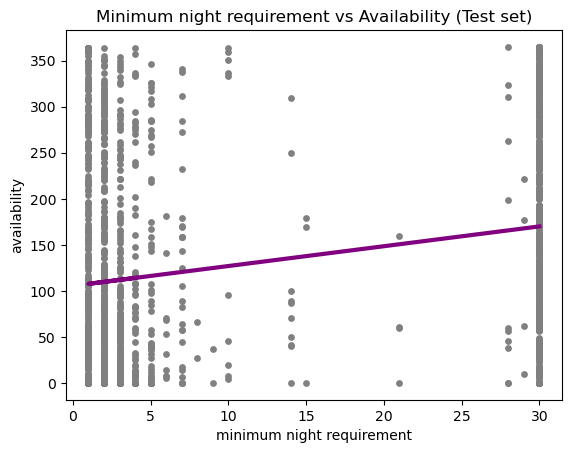

In [18]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='purple', linewidth =3)
plot_test.title('Minimum night requirement vs Availability (Test set)')
plot_test.xlabel('minimum night requirement')
plot_test.ylabel('availability')
plot_test.show()

## Task Step 10 - Interpretation

It is clear that the line does not cover the data points in this graph. There is quite a bit of variability here, so I am not expecting very strong results from the regression analysis.

## Task Step 11 - Check model performance statistics

In [20]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [21]:
# Print summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.15183661]]
Mean squared error:  13023.905539547422
R2 score:  0.04597482819805743


As expected, the regression line isn't an accurate representation of the data, as seen in the size of the mean squared error. The R2 value is also close to zero, indicating a poor fit.

## Task Step 12 - Compare predicted y values with actual y values

In [22]:
y_predicted

array([[114.07116378],
       [114.07116378],
       [111.91932717],
       ...,
       [109.76749056],
       [170.01891562],
       [170.01891562]])

In [23]:
# Create dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [24]:
data.head(30)

,Actual,Predicted
0,357,114.071164
1,18,114.071164
2,65,111.919327
3,0,107.615654
4,48,111.919327
5,294,170.018916
6,47,109.767491
7,50,111.919327
8,171,170.018916
9,89,109.767491


In [25]:
# Predict
y_predicted_train = regression.predict(X_train)

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.15183661]]
Mean squared error:  12943.979454133738
R2 score:  0.05681056666017037


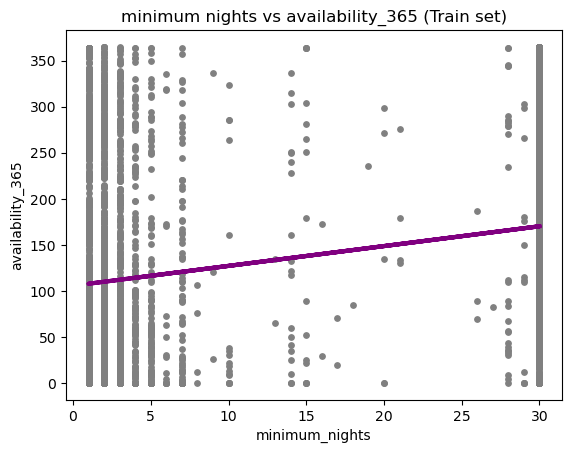

In [28]:
# Visualizing the training set results

plot_train = plt
plot_train.scatter(X_train, y_train, color='grey', s = 15)
plot_train.plot(X_train, y_predicted_train, color='purple', linewidth =3)
plot_train.title('minimum nights vs availability_365 (Train set)')
plot_train.xlabel('minimum_nights')
plot_train.ylabel('availability_365')
plot_train.show()

## Task Step 13 - Model performance assessment

Just from the Actual vs Predicted data alone, we can see that the model did not perform very well. We can also see this through the summary statistics of the mean squared error and R2 value - both of which indicate that the relationship can't be explained via a linear relationship. We can rule out the hypothesis that a high minimum night requirement will lead to high availability of the Airbnb unit. Part of the issue with this relationship is that there are multiple factors affecting both variables - "Availability" is not just defined as whether or not a unit is booked by a renter, but also if the unit owner has blocked it off for personal use. Minimum nights is also set by the unit owner and could be impacted by multiple personal decisions, so I am not overly surprised this relationship is not purely linear!